In [0]:
#connect with drive

from google.colab import drive
drive.mount("/content/drive")

In [0]:
%cd drive/My\ Drive

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
bs = 32

In [0]:
#Load and normalize data

path_img = Path('Final_rgdata')
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

In [0]:
data.show_batch(rows=3, figsize=(8,6))

In [0]:
print(data.classes)
len(data.classes), data.c

In [0]:
#define the initial architecture
learn = create_cnn(data, models.densenet161, metrics=error_rate)

In [0]:
#train the model
learn.fit_one_cycle(24)

In [0]:
#save model
learn.save('Final_d161')

In [0]:
#interpret the training reults
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

In [0]:
interp.most_confused(min_val=2)

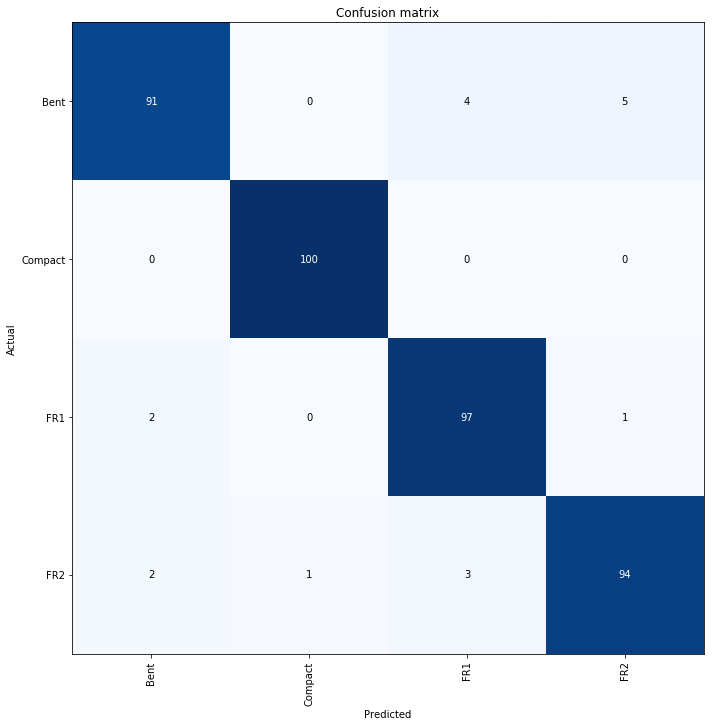

In [0]:
#get the results for the validation set
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
#export the model as pickle
learn.export('Final_d161.pkl')

In [0]:
img = open_image('Final_rgdata/test/Bent/J003113.86+001236.2.jpeg')
img

In [0]:
#predict on a single image
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [0]:
#optional : To optimize the model and parameter tuning
learn.lr_find()
learn.recorder.plot()

#Tweak the layers
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3)) #based on the best learning rate

In [0]:
#Optional: Save the model again, if tweaked and optimized
learn.save('Final_d161')

In [0]:
#Optional: Export the better model if optimized
learn.export('Final_d161.pkl')

In [0]:
#Testing the model

path_img = Path('Final_rgdata')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

In [0]:
#Get the architecture and reload the model weights
learn = create_cnn(data, models.densenet161, metrics=error_rate)

In [0]:
learn = learn.load('Final_d161')

In [0]:
#interpret for the test data
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

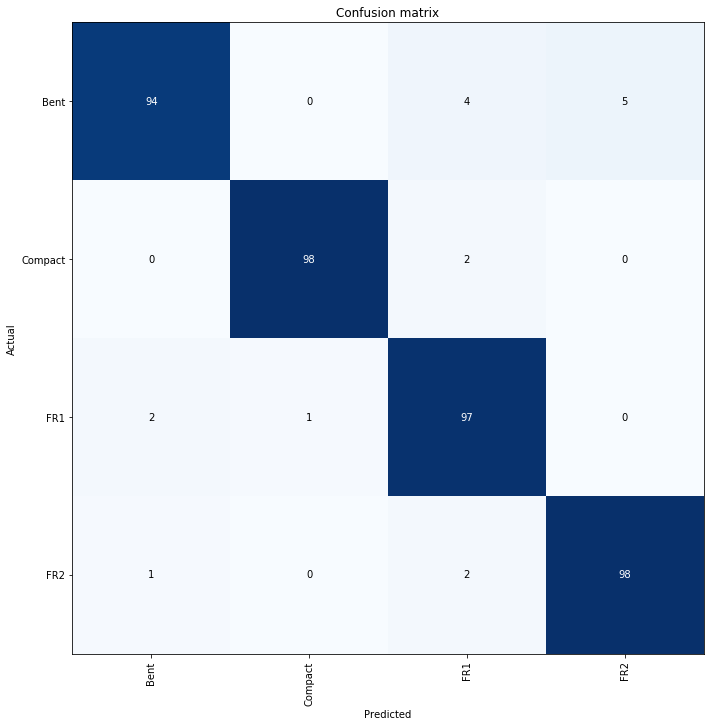

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
interp.most_confused(min_val=2)

In [0]:
learn.export('Final_d161.pkl')